# Exact differential equations

DE is exact, when:

$$ M(x, y)dx + N(x, y)dy = $\frac{\partial{f}}{\partial{x}}dx + \frac{\partial{f}}{\partial{y}}dy $$

In [1]:
import sys
sys.path.append('..')

In [2]:
from CommonFunctions import *
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [3]:
x, y = sp.symbols('x y')
f = sp.Function('f')(x)

# $2xy dx + (x^2 - 1)dy = 0 $

In [4]:
diff_eq = sp.Eq(2*x*f + (x**2 - 1)*f.diff(x), 0)
diff_eq

Eq(2*x*f(x) + (x**2 - 1)*Derivative(f(x), x), 0)

In [5]:
solution = sp.dsolve(diff_eq, f, hint='1st_exact')
solution

Eq(f(x), C1/(x**2 - 1))

In [6]:
direction_field = sp.solve(diff_eq, f.diff(x))[0].subs(f, y)
direction_field

-2*x*y/(x**2 - 1)

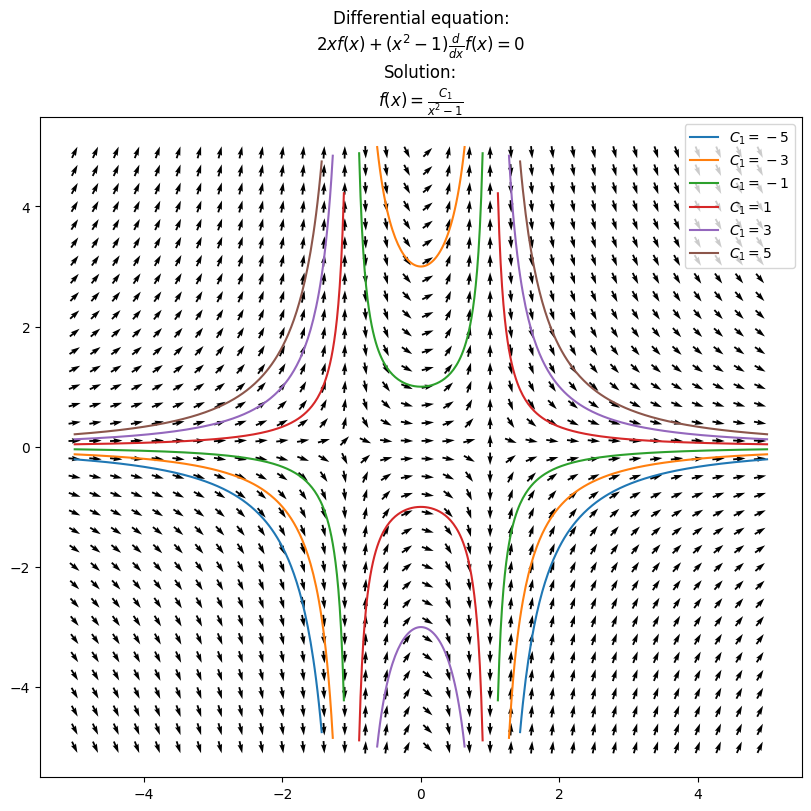

In [7]:
C1 = sp.Symbol('C1')
a, b = -5, 5
x_values = np.linspace(a, b, 500)
consts = [[(C1, i)] for i in range(-5, 6, 2)]
figure, axes = plt.subplots(1, 1, figsize=(8, 8), layout='constrained')
plot_many_functions(solution, x, diff_eq, x_values, consts, axes, threshold=(a, b), legend=True)
plot_direction_field(x, y, direction_field, (a, b, a, b, .3), axes, title=False)

# $(e^{2y} - y \cos{xy})dx + (2xe^{2y} - x \cos{xy} + 2y)dy = 0$

In [8]:
diff_eq = sp.Eq((sp.exp(2*f) - f*sp.cos(x*f)) + (2*x*sp.exp(2*f) - x*sp.cos(x*f) + 2*f)*f.diff(x), 0)
diff_eq

Eq((2*x*exp(2*f(x)) - x*cos(x*f(x)) + 2*f(x))*Derivative(f(x), x) - f(x)*cos(x*f(x)) + exp(2*f(x)), 0)

In [9]:
solution = sp.dsolve(diff_eq, f, hint='1st_exact')
solution

Eq(x*exp(2*f(x)) - Piecewise((sin(x*f(x))/f(x), Ne(f(x), 0)), (x, True))*f(x) + f(x)**2, C1)

In [10]:
direction_field = sp.solve(diff_eq, f.diff(x))[0].subs(f, y)
direction_field

(-y*cos(x*y) + exp(2*y))/(-2*x*exp(2*y) + x*cos(x*y) - 2*y)

<lambdifygenerated-9>:2: RuntimeWarning: overflow encountered in exp
  return (-_Dummy_224*cos(_Dummy_224*x) + exp(2*_Dummy_224))/(-2*_Dummy_224 - 2*x*exp(2*_Dummy_224) + x*cos(_Dummy_224*x))
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in divide
  return (-_Dummy_224*cos(_Dummy_224*x) + exp(2*_Dummy_224))/(-2*_Dummy_224 - 2*x*exp(2*_Dummy_224) + x*cos(_Dummy_224*x))


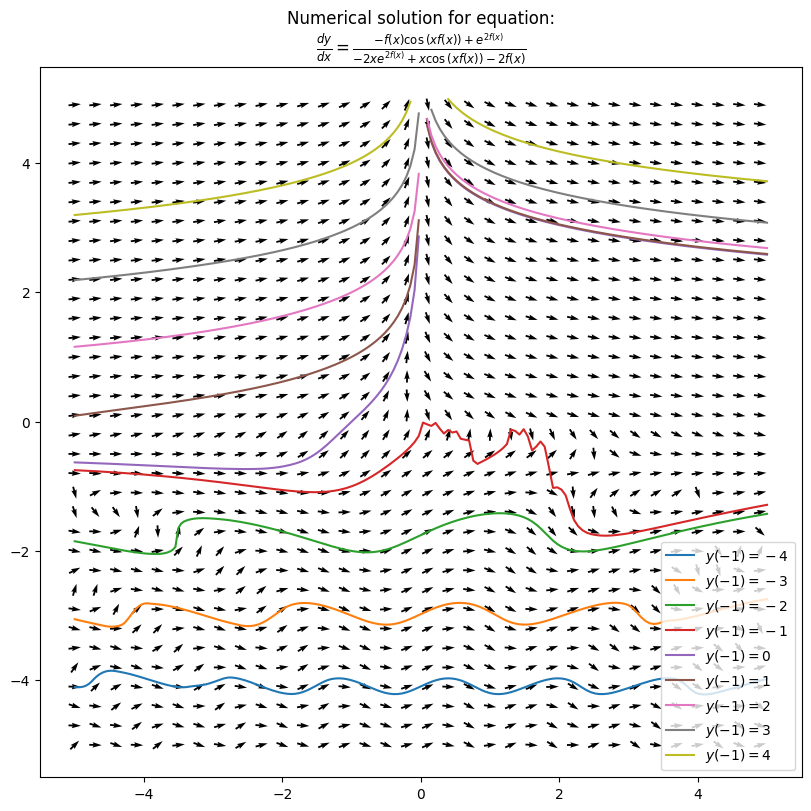

In [11]:
a, b = -5, 5
quality = 200
x_values = np.linspace(a, b, 500)
consts = [[(C1, i)] for i in range(-5, 6, 2)]
figure, axes = plt.subplots(1, 1, figsize=(8, 8), layout='constrained')
plot_direction_field(x, y, direction_field, (a, b, a, b, .3), axes, title=False)

initial_x = -1
initial_conditions = np.arange(-4, 5, 1)
plot_numeric_solutions(direction_field.subs(y, f), x, f, initial_conditions, initial_x, (a, b), quality, axes, legend=True, title=True, threshold=(a, b))

# $x \frac{dy}{dx} = 2xe^x - y + 6x^2$

In [12]:
diff_eq = sp.Eq(x * f.diff(x), 2*x*sp.exp(x) - f + 6*x**2)
diff_eq

Eq(x*Derivative(f(x), x), 6*x**2 + 2*x*exp(x) - f(x))

In [13]:
solution = sp.dsolve(diff_eq, f, hint='1st_exact')
solution

Eq(f(x), C1/x + 2*x**2 + 2*exp(x) - 2*exp(x)/x)

In [14]:
direction_field = sp.solve(diff_eq, f.diff(x))[0].subs(f, y)
direction_field

6*x + 2*exp(x) - y/x

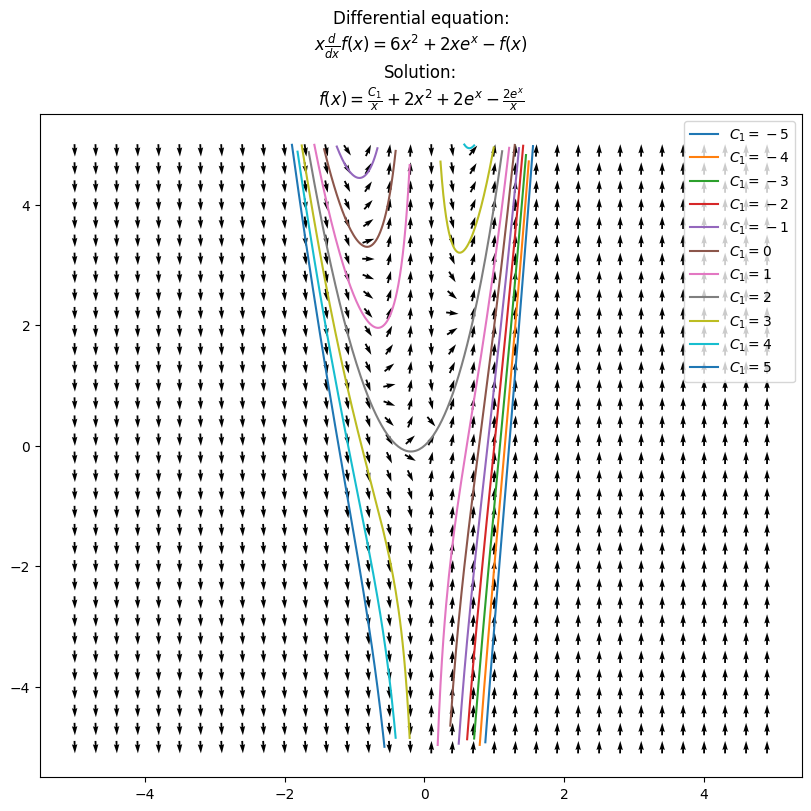

In [15]:
a, b = -5, 5
quality = 200
consts = [[(C1, i)] for i in range(-5, 6, 1)]
figure, axes = plt.subplots(1, 1, figsize=(8, 8), layout='constrained')
plot_many_functions(solution, x, diff_eq, x_values, consts, axes, threshold=(a, b), legend=True)
plot_direction_field(x, y, direction_field, (a, b, a, b, .3), axes, title=False)